In [2]:
!pip install matplotlib seaborn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import matplotlib.pyplot as plt
import seaborn as sns


nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
def preprocess_tweet(tweet):
    # Remove URLs, mentions, and hashtags
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    tweet = re.sub(r'@\w+|#\w+', '', tweet)

    # Convert to lowercase
    tweet = tweet.lower()

    # Remove punctuation and special characters
    tweet = re.sub(r'[^\w\s]', '', tweet)

    # Remove stop words and lemmatize
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tweet = ' '.join([lemmatizer.lemmatize(word) for word in tweet.split() if word not in stop_words])

    return tweet

# Load the tweets dataset, specifying the encoding and no header
tweets_df = pd.read_csv('tweet_100K.csv', encoding='latin-1', header=None)  # header=None tells pandas there are no headers

# Assign column names
tweets_df.columns = ['id', 'timestamp', 'date', 'query', 'user', 'tweet'] # Replace with your actual column order

# Apply preprocessing to the 'tweet' column
tweets_df['text'] = tweets_df['tweet'].apply(preprocess_tweet)

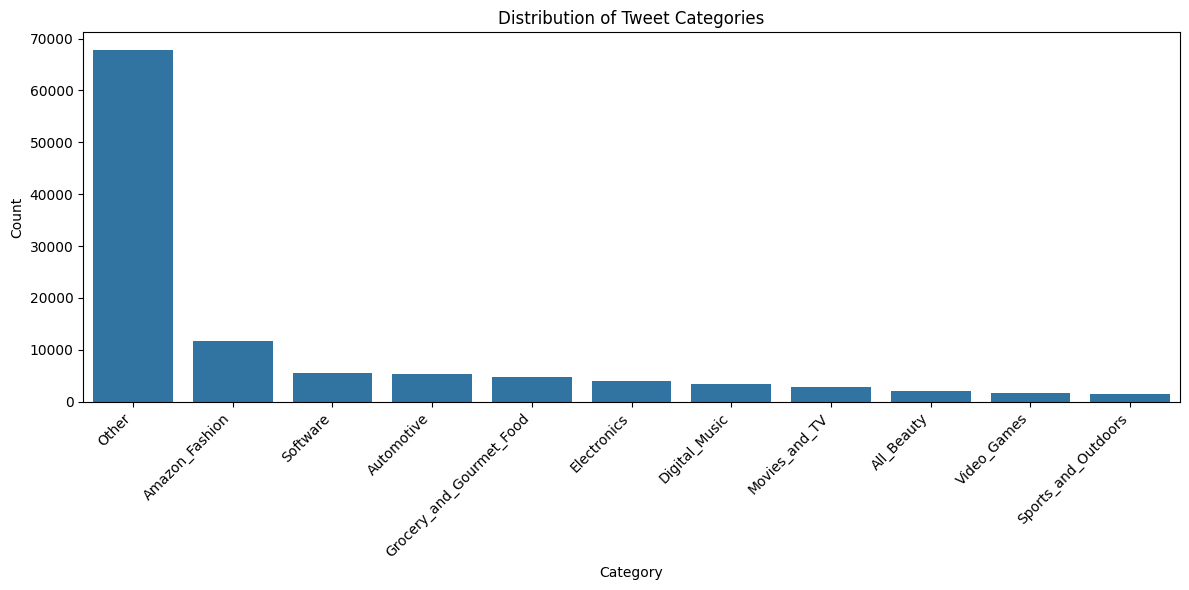

In [4]:
def assign_category(tweet):
    categories = {
        "All_Beauty": ["beauty", "makeup", "cosmetics", "skincare", "haircare", "fragrance", "perfume", "nail", "salon", "spa", "lotion", "cream", "lipstick", "eyeliner", "mascara", "foundation", "blush", "eyeshadow", "shampoo", "conditioner", "hairstyling", "manicure", "pedicure", "facial", "massage", "waxing", "sephora", "ulta", "mac", "maybelline", "loreal", "revlon", "clinique", "este lauder", "lancome"],
        "Amazon_Fashion": ["fashion", "clothing", "shoes", "accessories", "dress", "shirt", "pants", "jeans", "jacket", "coat", "handbag", "jewelry", "watch", "sunglasses", "style", "trend", "outfit", "apparel", "footwear", "sneaker", "heel", "boot", "sandal", "scarf", "belt", "hat", "bag", "purse", "wallet", "necklace", "earring", "bracelet", "ring", "nike", "adidas", "puma", "zara", "h&m", "forever 21", "levi's", "ralph lauren", "gucci", "prada", "louis vuitton"],
        "Automotive": ["car", "vehicle", "auto", "engine", "tire", "wheel", "brake", "repair", "maintenance", "driving", "road", "travel", "automobile", "truck", "suv", "sedan", "coupe", "sports car", "electric car", "hybrid car", "gasoline", "diesel", "mileage", "fuel", "transmission", "steering", "suspension", "airbag", "seatbelt", "navigation", "gps", "tesla", "toyota", "honda", "ford", "chevrolet", "bmw", "mercedes-benz", "audi", "volkswagen"],
        "Electronics": ["electronics", "gadget", "phone", "laptop", "computer", "tablet", "camera", "tv", "speaker", "headphone", "charger", "battery", "smartphone", "android", "ios", "iphone", "samsung", "google", "apple", "dell", "hp", "lenovo", "asus", "acer", "sony", "canon", "nikon", "bose", "jbl", "beats", "anker", "belkin"],
        "Digital_Music": ["music", "song", "album", "artist", "band", "singer", "concert", "streaming", "spotify", "apple music", "mp3", "audio", "playlist", "genre", "rock", "pop", "hip hop", "classical", "jazz", "country", "electronic", "dance", "sound", "melody", "rhythm", "instrument", "guitar", "piano", "drums", "vocals", "microphone"],
        "Software": ["software", "program", "app", "code", "development", "programming", "web", "mobile", "database", "cloud", "python", "java", "application", "website", "design", "coding", "algorithm", "data", "security", "cybersecurity", "artificial intelligence", "machine learning", "deep learning", "microsoft", "google", "apple", "amazon", "facebook", "oracle", "salesforce", "adobe"],
        "Sports_and_Outdoors": ["sport", "outdoor", "fitness", "hiking", "running", "cycling", "swimming", "yoga", "gym", "camping", "fishing", "hunting", "football", "basketball", "baseball", "soccer", "tennis", "golf", "cricket", "hockey", "volleyball", "training", "exercise", "workout", "equipment", "gear", "apparel", "shoes", "nike", "adidas", "under armour", "reebok", "columbia", "patagonia", "north face"],
        "Video_Games": ["game", "gaming", "console", "playstation", "xbox", "nintendo", "pc gaming", "steam", "online", "multiplayer", "controller", "virtual reality", "video game", "esports", "streamer", "twitch", "youtube", "action", "adventure", "rpg", "strategy", "shooter", "simulation", "sports", "racing", "puzzle", "fortnite", "call of duty", "league of legends", "minecraft", "grand theft auto", "fifa", "madden"],
        "Grocery_and_Gourmet_Food": ["food", "grocery", "gourmet", "recipe", "cooking", "baking", "restaurant", "cafe", "meal", "dinner", "lunch", "breakfast", "organic", "vegan", "vegetarian", "produce", "meat", "seafood", "dairy", "bakery", "snacks", "beverages", "coffee", "tea", "wine", "beer", "chocolate", "cheese", "pasta", "rice", "bread", "cereal", "fruits", "vegetables", "whole foods", "trader joe's", "walmart", "target", "kroger", "amazon fresh", "instacart"],
        "Movies_and_TV": ["movie", "film", "tv", "series", "cinema", "netflix", "hulu", "amazon prime", "actor", "actress", "director", "trailer", "drama", "comedy", "action", "adventure", "sci-fi", "fantasy", "horror", "thriller", "romance", "documentary", "animation", "anime", "superhero", "marvel", "dc", "disney", "pixar", "hbo", "showtime", "starz", "amc", "fx", "cnn", "fox", "nbc", "cbs", "abc"]
    }
    found_categories = []  # To store found categories for this tweet
    for category, keywords in categories.items():
        for keyword in keywords:
            if keyword in tweet:
                found_categories.append(category)  # Add to list if found
                # Optional: Add break here if you only want the first match per category
    return found_categories or ['Other']  # Return list or 'Other' if none found

# Load the tweets dataset using the correct encoding
tweets_df = pd.read_csv('tweet_100K.csv', encoding='latin-1', header=None)
tweets_df.columns = ['id', 'timestamp', 'date', 'query', 'user', 'tweet']

# Preprocess the tweets
tweets_df['text'] = tweets_df['tweet'].apply(preprocess_tweet)

# Assign categories using the function
tweets_df['category'] = tweets_df['text'].apply(assign_category)

# Explode the 'category' column to create individual rows for each category
tweets_df_exploded = tweets_df.explode('category')

# Create a DataFrame with category counts using the exploded DataFrame
category_counts = tweets_df_exploded['category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

# Visualize category counts using Seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='Count', data=category_counts)
plt.xticks(rotation=45, ha='right')
plt.title('Distribution of Tweet Categories')
plt.tight_layout()
plt.show()

# Split into training and testing sets (using the exploded DataFrame)
X_train, X_test, y_train, y_test = train_test_split(
    tweets_df_exploded['text'], tweets_df_exploded['category'], test_size=0.2, random_state=42
)


In [5]:
import pandas as pd
from collections import defaultdict

user_categories = defaultdict(lambda: defaultdict(int))

for index, row in tweets_df.iterrows():
    user = row['user']
    # Access the 'category' column instead of 'categories'
    categories = row['category']
    for category in categories:
        user_categories[user][category] += 1

# Convert to DataFrame for easier analysis
user_category_df = pd.DataFrame.from_dict(user_categories, orient='index').fillna(0)

In [6]:
def get_top_categories(user, threshold=2):  # Example threshold
    """Returns the top categories for a user based on frequency."""
    # Check if the user exists in the DataFrame index
    if user not in user_category_df.index:
        print(f"User '{user}' not found in the dataset.")
        return []  # Or raise an exception if you prefer

    category_counts = user_category_df.loc[user].sort_values(ascending=False)
    top_categories = category_counts[category_counts >= threshold].index.tolist()
    return top_categories

# Get a list of actual user IDs from your DataFrame
actual_user_ids = tweets_df['user'].unique().tolist()

# Print a few user IDs to see their format
print("Some user IDs in your dataset:", actual_user_ids[:50])  # Print the first 50

# Example usage: Replace 'user1' with an actual user ID from your dataset
top_categories_for_user = get_top_categories(actual_user_ids[0])
print(f"Top categories for user {actual_user_ids[0]}: {top_categories_for_user}")

Some user IDs in your dataset: ['_TheSpecialOne_', 'scotthamilton', 'mattycus', 'ElleCTF', 'Karoli', 'joy_wolf', 'mybirch', 'coZZ', '2Hood4Hollywood', 'mimismo', 'erinx3leannexo', 'pardonlauren', 'TLeC', 'robrobbierobert', 'bayofwolves', 'HairByJess', 'lovesongwriter', 'armotley', 'starkissed', 'gi_gi_bee', 'quanvu', 'swinspeedx', 'cooliodoc', 'viJILLante', 'Ljelli3166', 'ChicagoCubbie', 'KatieAngell', 'gagoo', 'abel209', 'BaptisteTheFool', 'fatkat309', 'EmCDL', 'merisssa', 'Pbearfox', 'jsoo', 'scarletletterm', 'crosland_12', 'ajaxpro', 'Tmttq86', 'Anthony_Nguyen', 'itsanimesh', 'lionslamb', 'kennypham', 'DdubsShellBell', 'hpfangirl94', 'antzpantz', 'labrt2004', 'IrisJumbe', 'peacoats', 'cyantist']
Top categories for user _TheSpecialOne_: []


In [7]:
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train_vec, y_train)

MultinomialNB()

In [8]:
# Predict categories for the test set
y_pred = classifier.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7475363891149083


In [9]:
# Function to save the model and vectorizer
def save_model_and_vectorizer(classifier, vectorizer):
  import pickle
  with open('tweet_classifier.pkl', 'wb') as f:
      pickle.dump(classifier, f)
  with open('tfidf_vectorizer.pkl', 'wb') as f:
      pickle.dump(vectorizer, f)

In [10]:
# Funktion zur Vorhersage der Tweet-Kategorie
def predict_tweet_category(tweet):
  import pickle
  # Lade den Klassifikator und den Vektorisierer
  with open('tweet_classifier.pkl', 'rb') as f:
      classifier = pickle.load(f)
  with open('tfidf_vectorizer.pkl', 'rb') as f:
      vectorizer = pickle.load(f)

  # Import the preprocess_tweet function if it's in a different file/cell
  from IPython.display import display # This line ensures the current cell is displayed
                                     # after execution, preventing issues with function
                                     # visibility across cells in a notebook environment
  from __main__ import preprocess_tweet # This import specifically imports the
                                        # preprocess_tweet function that might be defined
                                        # earlier in the IPython notebook session.

  # Check if the input is a string
  if not isinstance(tweet, str):
      raise TypeError("Input 'tweet' must be a string.")

  # Vorverarbeiten des Tweets, ähnlich wie bei tweets_df['tweet'].apply(preprocess_tweet)
  processed_tweet = preprocess_tweet(tweet)

  # Transformiere den Tweet mit dem Vektorisierer
  tweet_vec = vectorizer.transform([processed_tweet])

  # Sage die Kategorie voraus
  predicted_category = classifier.predict(tweet_vec)[0]

  return predicted_category

In [11]:
# Call the save function to save your model and vectorizer
save_model_and_vectorizer(classifier, vectorizer)

# Example usage of the prediction function
new_tweet = "I love this new lipstick!"
predicted_category = predict_tweet_category(new_tweet)
print(f"Predicted category: {predicted_category}")

Predicted category: Other


In [12]:
!pip install datasketch scikit-learn
from datasketch import MinHash, MinHashLSH
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.2/89.2 kB 6.5 MB/s eta 0:00:00


In [13]:
user_tweets = tweets_df.groupby('user')['text'].apply(list).to_dict()

user_minhashes = {}
for user, tweets in user_tweets.items():
    minhash = MinHash(num_perm=64)
    for tweet in tweets:
        minhash.update(tweet.encode('utf8'))
    user_minhashes[user] = minhash

In [14]:
lsh = MinHashLSH(threshold=0.5, num_perm=64)
for user, minhash in user_minhashes.items():
    lsh.insert(user, minhash)

# Extract the MinHash signatures (numerical representations)
minhash_signatures = [minhash.digest() for minhash in user_minhashes.values()]

# Now use minhash_signatures for KMeans clustering
kmeans = KMeans(n_clusters=10, random_state=42)
cluster_labels = kmeans.fit_predict(minhash_signatures)

In [15]:
user_clusters = dict(zip(user_minhashes.keys(), cluster_labels))

# Create a dataframe with user, cluster, and top categories
cluster_df = pd.DataFrame(list(user_clusters.items()), columns=['user', 'cluster'])
cluster_df['top_categories'] = cluster_df['user'].apply(get_top_categories)

# Display the dataframe
display(cluster_df)



,user,cluster,top_categories
0,006jazzy,3,[]
1,007buddha,7,[]
2,007peter,7,[]
3,007simple,3,[]
4,00jillian,1,[]
...,...,...,...
77887,zzjulz,8,[]
77888,zzme902,8,[]
77889,zzoem,0,[]
77890,zzpip,4,[]


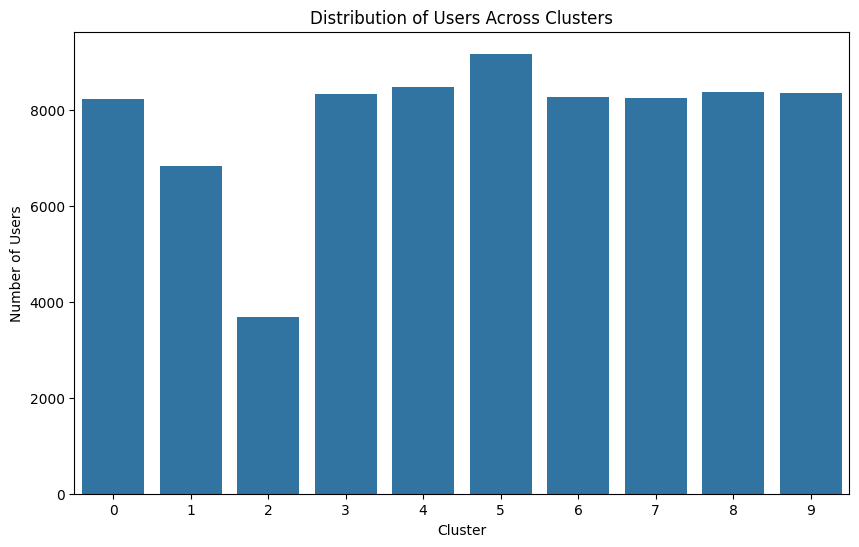

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='cluster', data=cluster_df)
plt.title('Distribution of Users Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Users')
plt.show()

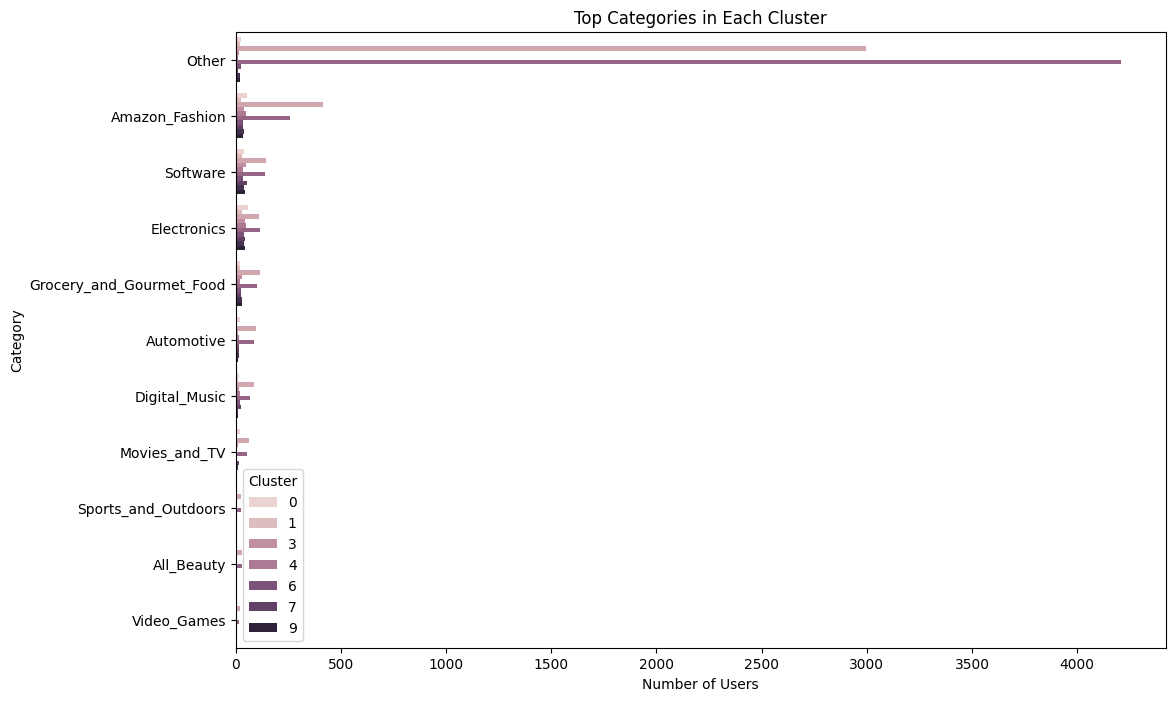

In [17]:
# Get top categories for each cluster
cluster_categories = cluster_df.groupby('cluster')['top_categories'].sum().reset_index()

# Explode the 'top_categories' column for visualization
cluster_categories_exploded = cluster_categories.explode('top_categories')

# Visualize top categories per cluster
plt.figure(figsize=(12, 8))
sns.countplot(y='top_categories', hue='cluster', data=cluster_categories_exploded,
              order=cluster_categories_exploded['top_categories'].value_counts().index)
plt.title('Top Categories in Each Cluster')
plt.xlabel('Number of Users')
plt.ylabel('Category')
plt.legend(title='Cluster')
plt.show()

In [18]:
# 1. Analyze Top Categories:
for cluster in range(10):
    top_categories = cluster_categories_exploded[cluster_categories_exploded['cluster'] == cluster]['top_categories'].value_counts().head(3).index.tolist()
    print(f"Cluster {cluster}: Top categories - {top_categories}")

# 2. Analyze Tweet Content:
def get_cluster_tweets(cluster_num, num_samples=5):
    users_in_cluster = cluster_df[cluster_df['cluster'] == cluster_num]['user'].tolist()
    cluster_tweets = tweets_df[tweets_df['user'].isin(users_in_cluster)]['text'].sample(num_samples).tolist()
    return cluster_tweets

for cluster in range(10):
    sample_tweets = get_cluster_tweets(cluster)
    print(f"Cluster {cluster}: Sample Tweets:")
    for tweet in sample_tweets:
        print(tweet)
    print("\n")

# 3. Label Clusters:
cluster_labels = {}

cluster_labels[0] = "Tech & Gaming"
cluster_labels[1] = "Fashion & Beauty"
cluster_labels[2] = "Automotive & Travel"
cluster_labels[3] = "Entertainment & Pop Culture"
cluster_labels[4] = "Foodies & Health"
cluster_labels[5] = "Sports & Outdoors"
cluster_labels[6] = "News & Politics"
cluster_labels[7] = "Business & Finance"
cluster_labels[8] = "Science & Technology"
cluster_labels[9] = "General Interest"

cluster_df['cluster_label'] = cluster_df['cluster'].map(cluster_labels)

# Display the updated DataFrame with cluster labels:
display(cluster_df)

Cluster 0: Top categories - ['Electronics', 'Amazon_Fashion', 'Software']
Cluster 1: Top categories - ['Software', 'Electronics', 'Amazon_Fashion']
Cluster 2: Top categories - ['Other', 'Amazon_Fashion', 'Software']
Cluster 3: Top categories - ['Software', 'Electronics', 'Amazon_Fashion']
Cluster 4: Top categories - ['Electronics', 'Amazon_Fashion', 'Software']
Cluster 5: Top categories - ['Other', 'Amazon_Fashion', 'Software']
Cluster 6: Top categories - ['Electronics', 'Software', 'Amazon_Fashion']
Cluster 7: Top categories - ['Software', 'Electronics', 'Amazon_Fashion']
Cluster 8: Top categories - ['Electronics', 'Software', 'Amazon_Fashion']
Cluster 9: Top categories - ['Electronics', 'Software', 'Amazon_Fashion']
Cluster 0: Sample Tweets:
im crispy critter ouch
start working uk gaming news quiet week dont expect gleen much internet tube
hate waking morning sinus infection worst
tired like sleep age
reinstalled osx macbook broken bit guess one turn last mac screwed backin yesterday

,user,cluster,top_categories,cluster_label
0,006jazzy,3,[],Entertainment & Pop Culture
1,007buddha,7,[],Business & Finance
2,007peter,7,[],Business & Finance
3,007simple,3,[],Entertainment & Pop Culture
4,00jillian,1,[],Fashion & Beauty
...,...,...,...,...
77887,zzjulz,8,[],Science & Technology
77888,zzme902,8,[],Science & Technology
77889,zzoem,0,[],Tech & Gaming
77890,zzpip,4,[],Foodies & Health


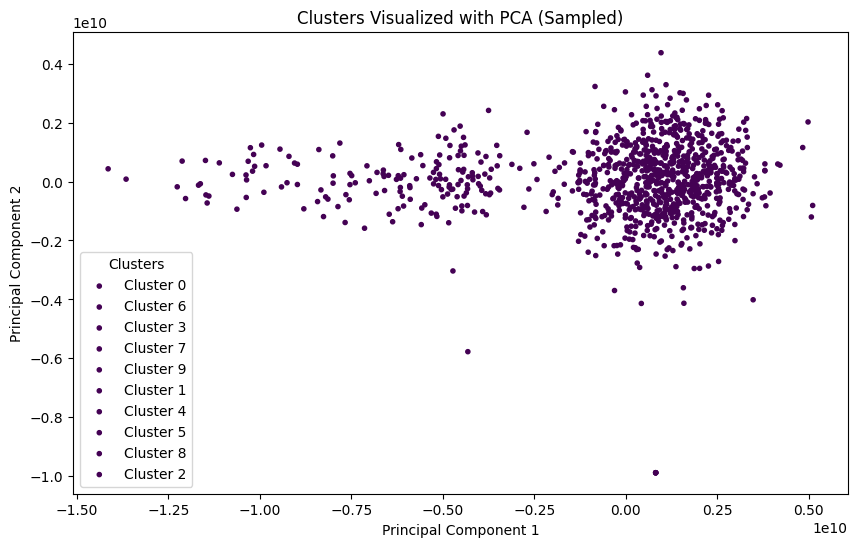

In [19]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Get cluster centers
cluster_centers = kmeans.cluster_centers_

# Assuming 'minhash_signatures' is your original data for dimensionality reduction
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(minhash_signatures)

# Create a DataFrame with reduced data and cluster labels
reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
# Instead of cluster labels (strings), use the original cluster numbers for 'c'
reduced_df['cluster_num'] = cluster_labels = kmeans.labels_  # Assuming cluster_labels contains numerical cluster assignments

# Reduce the number of points for visualization (sampling)
sample_size = 1000
sample_indices = np.random.choice(reduced_df.index, size=sample_size, replace=False)
sample_df = reduced_df.loc[sample_indices]

# Plot the sampled data points with cluster assignments
plt.figure(figsize=(10, 6))

#Create a scatter plot for each cluster
# Use 'cluster_num' for the 'c' argument
for cluster in sample_df['cluster_num'].unique():
    cluster_data = sample_df[sample_df['cluster_num'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'],
                c=cluster_data['cluster_num'], cmap='viridis', marker='.', label=f'Cluster {cluster}')

# Add legend
plt.legend(title='Clusters', loc='best')

plt.title('Clusters Visualized with PCA (Sampled)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [20]:
from scipy.spatial.distance import cdist
import numpy as np

# Assuming 'minhash_signatures' is your original data used for clustering
# and 'cluster_labels' contains the cluster assignments from KMeans

# Calculate distances between MinHash signatures and cluster centers
distances = cdist(minhash_signatures, cluster_centers)

# Experiment with different radii to potentially find overlapping points
for radius in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]:
    overlapping_points = np.where(np.sum(distances <= radius, axis=1) > 1)[0]

    # Get the corresponding users for these overlapping points
    if overlapping_points.size > 0:
        overlapping_users = [list(user_minhashes.keys())[i] for i in overlapping_points]
        print(f"Radius: {radius}, Overlapping users: {overlapping_users}")
    else:
        print(f"Radius: {radius}, No overlapping users found.")

Radius: 0.1, No overlapping users found.
Radius: 0.2, No overlapping users found.
Radius: 0.3, No overlapping users found.
Radius: 0.4, No overlapping users found.
Radius: 0.5, No overlapping users found.
Radius: 0.6, No overlapping users found.
Radius: 0.7, No overlapping users found.
Radius: 0.8, No overlapping users found.
Radius: 0.9, No overlapping users found.
Radius: 1.0, No overlapping users found.


In [21]:
# Save the LSH index
import pickle
with open('lsh_index.pkl', 'wb') as f:
    pickle.dump(lsh, f)

# Save any other relevant data, like user_minhashes or cluster_df
with open('user_minhashes.pkl', 'wb') as f:
    pickle.dump(user_minhashes, f)

# ... (save other data as needed)

In [22]:
import pickle

# Load the LSH index
with open('lsh_index.pkl', 'rb') as f:
    lsh = pickle.load(f)

# Load other saved data
with open('user_minhashes.pkl', 'rb') as f:
    user_minhashes = pickle.load(f)

# ... (load other data as needed)

In [23]:
import json

with open('dataset_tweet-scraper.json', 'r') as f:  # Assuming your JSON file is named 'new_tweets.json'
    new_tweets_data = json.load(f)

# Create a DataFrame from the JSON data
new_tweets_df = pd.DataFrame(new_tweets_data)

In [24]:
# Preprocess the tweets using your existing preprocess_tweet function
new_tweets_df['text'] = new_tweets_df['text'].apply(preprocess_tweet)

# Assign categories using your existing assign_category function
new_tweets_df['category'] = new_tweets_df['text'].apply(assign_category)

# Display the DataFrame with categories
display(new_tweets_df)

,id,viewCount,twitterUrl,text,createdAt,likeCount,retweetCount,quoteCount,category
0,1866353281087500636,1431,https://twitter.com/marvinmusk/status/18663532...,call language,Tue Dec 10 05:24:32 +0000 2024,35,4,3,[Other]
1,1866290150080200981,3815,https://twitter.com/marvinmusk/status/18662901...,could dinner living celebrity would aoprah win...,Tue Dec 10 01:13:40 +0000 2024,172,32,6,[Grocery_and_Gourmet_Food]
2,1866289122286924076,2379,https://twitter.com/marvinmusk/status/18662891...,honest agree elon musk one greatest engineer t...,Tue Dec 10 01:09:35 +0000 2024,182,30,3,[Automotive]
3,1866288930968187055,2577,https://twitter.com/marvinmusk/status/18662889...,tell person picture,Tue Dec 10 01:08:49 +0000 2024,62,11,4,[Other]
4,1866287443697131946,1378,https://twitter.com/marvinmusk/status/18662874...,see post feed comment anything even dot let se...,Tue Dec 10 01:02:55 +0000 2024,98,10,1,[Other]
5,1866286887058452590,1978,https://twitter.com/marvinmusk/status/18662868...,former first lady michelle obama remembered,Tue Dec 10 01:00:42 +0000 2024,32,6,3,[Other]
6,1866286628647620818,1740,https://twitter.com/marvinmusk/status/18662866...,trust bill gate human livestock vaccine yes,Tue Dec 10 00:59:40 +0000 2024,40,9,1,[Other]
7,1866286215638426111,4434,https://twitter.com/marvinmusk/status/18662862...,tell truth would still support threw prison yes b,Tue Dec 10 00:58:02 +0000 2024,271,39,5,[Other]


In [25]:
# Create MinHashes for the new tweets
new_user_minhashes = {}
for index, row in new_tweets_df.iterrows():
    user = row['id']  # Assuming 'id' represents the user in your JSON data
    tweet = row['text']
    minhash = MinHash(num_perm=64)  # Use the same num_perm as before
    minhash.update(tweet.encode('utf8'))
    new_user_minhashes[user] = minhash

# Update your existing user_minhashes dictionary
user_minhashes.update(new_user_minhashes)

In [26]:


# Save the updated user_minhashes dictionary
import pickle

with open('user_minhashes.pkl', 'wb') as f:
    pickle.dump(user_minhashes, f)

print("Updated user_minhashes saved to user_minhashes.pkl")

Updated user_minhashes saved to user_minhashes.pkl
